In [2]:
#pip install citipy
import csv
import os
from random import uniform
from random import random
import matplotlib.pyplot as plt
import requests as req
import pandas as pd
import json
from citipy import citipy as cp
import math

In [3]:
#Weather API
api_key = "62262785d73674ea77c4cb358e1f421e"
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "IMPERIAL"

#Looking up a city nearest to the equator - test
#city = cp.nearest_city(0, 0)
#print(city)             
#print(city.city_name)
#print(city.country_code)

cities = []
#random number generator for latitude, longitude; set limits -60 lat, 80 lat
def randompoint():
   return uniform(-60, 80), uniform(-90, 90)

points = (randompoint() for x in range(100))
for point in points:
        xlat = point[0]
        ylon = point[1]
        city = cp.nearest_city(xlat, ylon)
        
        if city.city_name not in cities:
            cities.append(city.city_name)

new_cities = cities

In [4]:
print(new_cities)

['vila franca do campo', 'mayumba', 'bur gabo', 'qaanaaq', 'hamilton', 'chuy', 'yuryev-polskiy', 'ust-ishim', 'warqla', 'faya', 'luderitz', 'santa eulalia', 'karauzyak', 'tasiilaq', 'lagoa', 'margate', 'bambous virieux', 'kamenka', 'amderma', 'ribeira grande', 'zhanaozen', 'ushuaia', 'meulaboh', 'castro', 'torbay', 'korla', 'kolokani', 'boyuibe', 'westport', 'kingsport', 'itupiranga', 'boden', 'kudahuvadhoo', 'tazovskiy', 'kambove', 'upernavik', 'zaporizhzhya', 'omboue', 'san cristobal', 'parnarama', 'jamestown', 'ushtobe', 'vila velha', 'olafsvik', 'kalmunai', 'illoqqortoormiut', 'votkinsk', 'balykshi', 'pisco', 'kyshtovka', 'surab', 'general roca', 'kaduna', 'ugoofaaru', 'karatau', 'antofagasta', 'olmos', 'henties bay', 'clyde river', 'camabatela', 'aksarka', 'zwedru', 'saint-philippe', 'mar del plata', 'belushya guba', 'quixada', 'sechura', 'rondonopolis', 'kabardinka', 'barbar', 'nanortalik', 'garissa', 'tabuk', 'kralendijk', 'grand river south east', 'grindavik', 'nantucket', 'tim

In [5]:
# Build partial query URL
query_url = url + "appid=" + api_key + "&units=" + units + "&q="
weather_data = [req.get(query_url + city).json() for city in new_cities]
print(json.dumps(weather_data, indent=2))

[
  {
    "coord": {
      "lon": -25.43,
      "lat": 37.72
    },
    "weather": [
      {
        "id": 802,
        "main": "Clouds",
        "description": "scattered clouds",
        "icon": "03n"
      }
    ],
    "base": "stations",
    "main": {
      "temp": 71.6,
      "pressure": 1028,
      "humidity": 78,
      "temp_min": 71.6,
      "temp_max": 71.6
    },
    "visibility": 10000,
    "wind": {
      "speed": 5.82,
      "deg": 20
    },
    "clouds": {
      "all": 40
    },
    "dt": 1504989000,
    "sys": {
      "type": 1,
      "id": 5957,
      "message": 0.003,
      "country": "PT",
      "sunrise": 1504941563,
      "sunset": 1504987038
    },
    "id": 3372472,
    "name": "Vila Franca do Campo",
    "cod": 200
  },
  {
    "coord": {
      "lon": 10.66,
      "lat": -3.43
    },
    "weather": [
      {
        "id": 500,
        "main": "Rain",
        "description": "light rain",
        "icon": "10n"
      }
    ],
    "base": "stations",
    "main": {
  

In [6]:
csv_data = []

for data in weather_data:
    cities_name = data.get("name")
    cloud_data = data.get("clouds", {}).get("all", 0)
    country_data = data.get("sys", {}).get("country", "Unknown")
    date_data = [data.get("dt", 0) for data in weather_data]
    lat_data = data.get("coord", {}).get("lat", 0)
    lon_data = data.get("coord", {}).get("lon", 0)
    humidity_data = data.get("main", {}).get("humidity", 0)
    maxtemp_data = data.get("main", {}).get("temp_max", 0)

    single_row = [cities_name,cloud_data,country_data,date_data,lat_data,lon_data,humidity_data,maxtemp_data]
    csv_data.append(single_row)
    
root_path = os.path.join(os.getcwd())
data_path = os.path.join(root_path)
csvpath = os.path.join(root_path, "weather_data.csv")
with open(csvpath, "w", newline="") as csvfile:
    csvwriter = csv.writer(csvfile, delimiter=",")
    csvwriter.writerow(["City Name", "Cloudiness", "Country", "Date", "Latitude","Longitude","Humidity","Max Temp"])
    csvwriter.writerow(csv_data)

In [7]:
cloud_data = [data.get("clouds", {}).get("all", 0) for data in weather_data]
country_data = [data.get("sys", {}).get("country", "Unknown") for data in weather_data]
date_data = [data.get("dt", 0) for data in weather_data]
lat_data = [data.get("coord").get("lat") for data in weather_data]
lon_data = [data.get("coord").get("lon") for data in weather_data]
humidity_data = [data.get("main", {}).get("humidity", 0) for data in weather_data]
maxtemp_data = [data.get("main", {}).get("temp_max", 0) for data in weather_data]
windspeed_data = [data.get("wind", {}).get("speed", 0) for data in weather_data]

In [8]:
weather_data = pd.DataFrame(
    {
        "City": list(new_cities),
        "Cloudiness": list(cloud_data),
        "Country": list(country_data),
        "Date": list(date_data),
        "Humidity": humidity_data,
        "Lat": lat_data,
        "Lon": lon_data,
        "Max Temp": maxtemp_data,
        "Wind Speed": windspeed_data
    }
)

weather_data.head()

#root_path = os.path.join(os.getcwd())
#data_path = os.path.join(root_path)
#csvpath = os.path.join(root_path, "weather_data.csv")
#with open(csvpath, "w", newline="") as csvfile:
    #csvwriter = csv.writer(csvfile, delimiter=",")
    #csvwriter.writerow([new_cities,cloud_data,country_data,date_data,humidity_data,lat_data,lon_data,maxtemp_data,windspeed_data])

,City,Cloudiness,Country,Date,Humidity,Lat,Lon,Max Temp,Wind Speed
0,vila franca do campo,40,PT,1504989000,78,37.72,-25.43,71.60,5.82
1,mayumba,92,GA,1504991337,100,-3.43,10.66,73.39,8.14
2,bur gabo,75,FI,1504990200,100,60.22,24.78,57.20,9.17
3,qaanaaq,48,GL,1504991338,100,77.48,-69.36,27.49,14.00
4,hamilton,20,CA,1504987200,51,43.23,-79.95,62.60,3.36


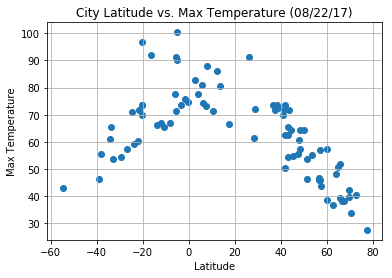

In [9]:
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o")

plt.title("City Latitude vs. Max Temperature (08/22/17)")
plt.ylabel("Max Temperature")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()

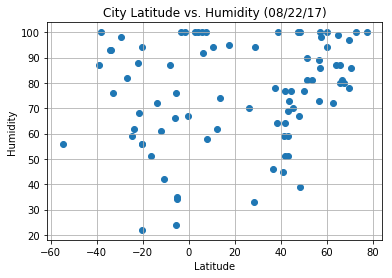

In [10]:
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o")

plt.title("City Latitude vs. Humidity (08/22/17)")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()

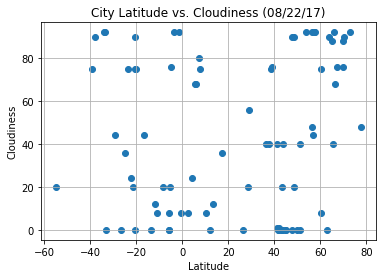

In [11]:
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o")

plt.title("City Latitude vs. Cloudiness (08/22/17)")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()

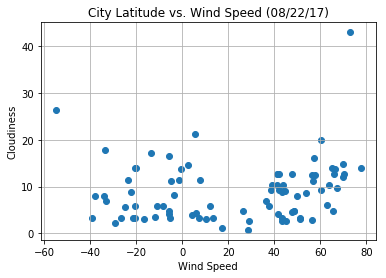

In [12]:
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o")

plt.title("City Latitude vs. Wind Speed (08/22/17)")
plt.ylabel("Cloudiness")
plt.xlabel("Wind Speed")
plt.grid(True)

plt.show()